In [1628]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [1629]:
# environment arg

scale = 150
learning_rate = 0.01

In [1630]:
# load data and set 總成績 as prediction
# input 10 channel, output 1 channel

df = pd.read_csv('Data.csv') / scale
train_sol = np.array(df['總成績']).T
df = df.drop('總成績', axis=1)
train_in = np.array(df)



In [1631]:
def ReLU(x):
    if x > 0:
        return x
    return 0.1 * x

def dReLU(x):
    if x > 0:
        return 1
    return 0.1

In [1632]:
# initialize nn_weights

np.random.seed(1)

nn_weights1 = 2 * np.random.random((10,1)) - 1
nn_weights2 = 2 * np.random.random((10,1)) - 1
nn_weights3 = 2 * np.random.random((1,1)) - 1
nn_weights4 = 2 * np.random.random((1,1)) - 1

loss = []

# train the network

for i in range(10000):
    
    # sigmoid
    train_out1 = ( 1 / (1 + np.exp(-(np.dot(train_in, nn_weights1)))) )
    train_out2 = ( 1 / (1 + np.exp(-(np.dot(train_in, nn_weights2)))) )
    train_add_out = np.dot(train_out1, nn_weights3) + np.dot(train_out2, nn_weights4)
    train_out3 = ( 1 / (1 + np.exp(-train_add_out)) )

    aloss = np.square(np.subtract(train_sol, train_out3.T)).mean()
    loss.append(aloss)
    print(aloss)

    nn_weights3 += np.dot(train_out1.T, (train_sol - train_out3.T).T * train_add_out * (1 - train_add_out)) * learning_rate 
    nn_weights4 += np.dot(train_out2.T, (train_sol - train_out3.T).T * train_add_out * (1 - train_add_out)) * learning_rate 
    nn_weights1 += np.dot(train_in.T, (train_sol - train_out3.T).T * train_add_out * (1 - train_add_out) * nn_weights3 * train_out1 * (1 - train_out1)) * learning_rate 
    nn_weights2 += np.dot(train_in.T, (train_sol - train_out3.T).T * train_add_out * (1 - train_add_out) * nn_weights4 * train_out2 * (1 - train_out2)) * learning_rate 
    
    

    '''# ReLU
    train_out1 = np.dot(train_in, nn_weights1)
    for x in np.nditer(train_out1, op_flags=['readwrite']): 
        x[...] = ReLU(x)
    train_out2 = np.dot(train_out1, nn_weights2)
    for x in np.nditer(train_out2, op_flags=['readwrite']): 
        x[...] = ReLU(x)

    aloss = np.square(np.subtract(train_sol, train_out2.T)).mean()
    loss.append(aloss)
    print(aloss)

    gra_train_out2 = train_out2
    for x in np.nditer(gra_train_out2, op_flags=['readwrite']): 
        x[...] = dReLU(x)
    gra_train_out1 = train_out1
    for x in np.nditer(gra_train_out1, op_flags=['readwrite']): 
        x[...] = dReLU(x)
    nn_weights2 += np.dot(train_out1.T, (train_sol - train_out2.T).T * gra_train_out2) * learning_rate
    nn_weights1 += np.dot(train_in.T, (train_sol - train_out2.T).T * gra_train_out2 * nn_weights2 * gra_train_out1) * learning_rate
    '''
    



0.020837357591294788
0.020807944749610587
0.02077861580995666
0.020749370542075787
0.020720208715936873
0.020691130101742648
0.020662134469937282
0.020633221591213665
0.020604391236520723
0.020575643177070464
0.02054697718434492
0.02051839303010296
0.02048989048638691
0.020461469325529096
0.02043312932015821
0.02040487024320552
0.020376691867911016
0.02034859396782935
0.020320576316835693
0.02029263868913144
0.020264780859249817
0.020237002602061325
0.020209303692779092
0.020181683906964114
0.02015414302053032
0.020126680809749605
0.02009929705125668
0.02007199152205385
0.020044763999515637
0.020017614261393403
0.019990542085819664
0.019963547251312518
0.01993662953677985
0.019909788721523446
0.01988302458524302
0.01985633690804015
0.0198297254704221
0.019803190053305553
0.01977673043802027
0.019750346406312624
0.019724037740349042
0.019697804222719415
0.019671645636440326
0.01964556176495828
0.019619552392152812
0.019593617302339494
0.019567756280272915
0.019541969111149454
0.01951625

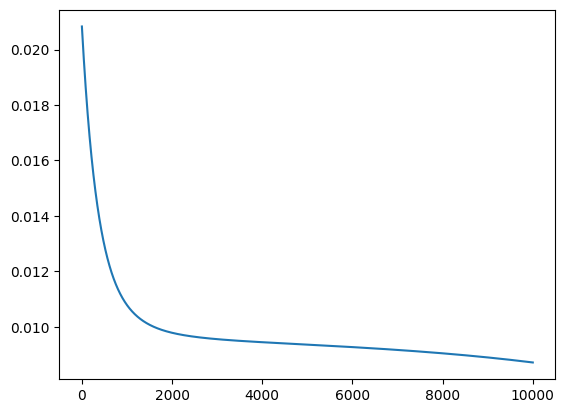

In [1633]:
plt.plot(loss)
plt.show()

In [1634]:
# test

test_in = np.array([11,86,90,93.5,93,90.63,90,99,106,98.33]) / scale
test_out1 = ( 1 / (1 + np.exp(-(np.dot(test_in, nn_weights1)))) )
test_out2 = ( 1 / (1 + np.exp(-(np.dot(test_in, nn_weights2)))) )
test_add_out = np.dot(test_out1, nn_weights3) + np.dot(test_out2, nn_weights4)
test_out3 = ( 1 / (1 + np.exp(-test_add_out)) )
print(test_out3 * scale)
print(np.square(np.subtract(train_sol, test_out3.T)).mean())

[78.17248247]
0.009189927854501631
